<a href="https://colab.research.google.com/github/FuturisticLover123/learning/blob/main/DataAnalys/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛБ06. Градиентный спуск

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [ ]:
import os
os.makedirs("output", exist_ok=True)

## 2.4.1

In [ ]:
def f_xy(x, y):
    return np.sin(x) * np.cos(y)

In [ ]:
def grad_f_xy(x, y):
    return np.array([np.cos(x) * np.cos(y), -np.sin(x) * np.sin(y)])

In [ ]:
# Numerical optimization starting near (1, 1)
def gradient_descent_f_xy(start, learning_rate=0.1, max_iters=1000, tol=1e-6):
    point = np.array(start)
    for i in range(max_iters):
        grad = grad_f_xy(point[0], point[1])
        new_point = point - learning_rate * grad
        if np.linalg.norm(new_point - point) < tol:
            break
        point = new_point
    return point

In [ ]:
start_point = [1, 1]
min_point = gradient_descent_f_xy(start_point)
print(min_point, f_xy(*min_point))

[1.57079085 3.14158457] -0.9999999999523462


## 2.4.2

In [ ]:
x = [
    [0, 1, 2, 3],
    [-1, -2, -3, -4],
    [-12, 3, 4, 5],
    [4, 2, 3, 1],
    [6, -1, -2, 5]
]

y = [0.1, 0.85, 0.05, 0.08, 0.76]

a0 = [1, 1, -1, 1]

In [ ]:
X = np.array(x, dtype='float64')
Y = np.array(y, dtype='float64')
A0 = np.array(a0, dtype='float64')

X, Y, A0

(array([[  0.,   1.,   2.,   3.],
        [ -1.,  -2.,  -3.,  -4.],
        [-12.,   3.,   4.,   5.],
        [  4.,   2.,   3.,   1.],
        [  6.,  -1.,  -2.,   5.]]),
 array([0.1 , 0.85, 0.05, 0.08, 0.76]),
 array([ 1.,  1., -1.,  1.]))

In [ ]:
def f_xa(x, a):
    return 1 / (1 + np.exp(-np.dot(a, x)))

def grad_f_xa(x, a):
    fx = f_xa(x, a)
    return fx * (1 - fx) * x

def loss(a, X, Y):
    total_loss = 0
    for i in range(len(X)):
        fx = f_xa(X[i], a)
        total_loss += (fx - Y[i])**2
    return total_loss

def grad_loss(a, X, Y):
    grad = np.zeros_like(a)
    for i in range(len(X)):
        fx = f_xa(X[i], a)
        grad_f = grad_f_xa(X[i], a)
        grad += 2 * (fx - Y[i]) * grad_f
    return grad

def gradient_descent_f_xa(a0, X, Y, learning_rate=0.01, max_iters=1000, tol=1e-6):
    a = a0.copy()
    history = [a.copy()]
    for i in range(max_iters):
        grad = grad_loss(a, X, Y)
        new_a = a - learning_rate * grad
        if np.linalg.norm(new_a - a) < tol:
            break
        a = new_a
        history.append(a.copy())
    return a, history

2.4.1: Minimum of f(x,y) near (1,1) is at [1.57079085 3.14158457], value = -0.9999999999523462
2.4.2: Best parameters a = [ 0.37607457  0.55852446 -1.75148469  0.38431714], loss = 0.0645005984204657


d:\code files\unik\DS\.venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


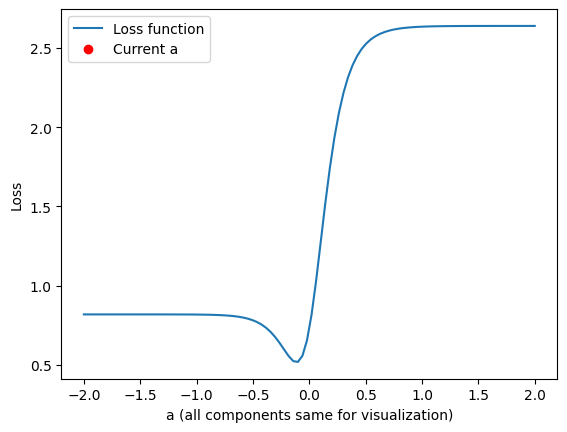

In [ ]:
best_a, history = gradient_descent_f_xa(A0, X, Y)
print(f"2.4.2: Best parameters a = {best_a}, loss = {loss(best_a, X, Y)}")

fig, ax = plt.subplots()
a_vals = np.linspace(-2, 2, 100)
loss_vals = [loss(np.array([a, a, a, a]), X, Y) for a in a_vals]
ax.plot(a_vals, loss_vals, label='Loss function')
line, = ax.plot([], [], 'ro', label='Current a')
ax.set_xlabel('a (all components same for visualization)')
ax.set_ylabel('Loss')
ax.legend()

def init():
    line.set_data([], [])
    return line,

def update(frame):
    a = history[frame]
    avg_a = np.mean(a)
    l = loss(a, X, Y)
    line.set_data(avg_a, l)
    return line,

ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True)
# ani.save(filename='output/gsd-animation.gif', writer=PillowWriter())
plt.show()